<img style="float: left;" src="../earth-lab-logo-rgb.png" width="150" height="150">

# Earth Data Science Corps Summer 2020

![Colored Bar](../colored-bar.png)

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Open, plot, and explore raster data using **Python**.
* Handle no data values in raster data. 
* Create plotting extents so you can plot raster and vector data together using matplotlib.
* Explore raster data using histograms and descriptive statistics.

</div>

## Open Raster Data in Open Source Python

Remember from the previous lesson that raster or “gridded” data are stored as a 
grid of values which are rendered on a map as pixels. Each pixel value 
represents an area on the Earth’s surface. A raster file is composed of 
regular grid of cells, all of which are the same size. Raster data can 
be used to store many different types of scientific data including 

* elevation data
* canopy height models
* surface temperature 
* climate model data outputs
* landuse / landcover data
* and more.

<figure>
   <a href="https://www.earthdatascience.org/images/earth-analytics/raster-data/raster-concept.png" target="_blank">
   <img src="https://www.earthdatascience.org/images/earth-analytics/raster-data/raster-concept.png" alt="Raster data concept diagram."></a>
   <figcaption>A raster is composed of a regular grid of cells. Each cell is the same
   size in the x and y direction. Source: Colin Williams, NEON.
   </figcaption>
</figure>

In this lesson you will learn more about working with lidar derived raster data
that represents both terrain / elevation data (elevation of the earth's surface),
and surface elevation (elevation at the tops of trees, buildings etc above the earth's
surface). If you want to read more about how lidar data are used to derive 
raster based surface models, you can check out <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/what-is-lidar-data/" target="_blank"> this chapter on lidar remote sensing data and the various raster data products derived from lidar data.</a> 

<figure>
   <a href="https://www.earthdatascience.org/images/earth-analytics/lidar-raster-data/lidarTree-height.png">
   <img src="https://www.earthdatascience.org/images/earth-analytics/lidar-raster-data/lidarTree-height.png" alt="Lidar derived DSM, DTM and CHM."></a>
   <figcaption>Digital Surface Model (DSM), Digital Elevation Models (DEM) and
   the Canopy Height Model (CHM) are the most common raster format lidar
   derived data products. One way to derive a CHM is to take
   the difference between the digital surface model (DSM, tops of trees, buildings
   and other objects) and the Digital Terrain Model (DTM, ground level). The CHM
   represents the actual height of trees, buildings, etc. with the influence of
   ground elevation removed. Graphic: Colin Williams, NEON
   </figcaption>
</figure>

<i class="fa fa-star"></i> **Data Tip:** 
The data used in this lesson are NEON (National Ecological Observatory Network) data. 
{: .notice--success }

To begin load the 
packages that you need to process your raster data.

In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [2]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

Below, you define the path to a lidar derived digital elevation model (DEM)
that was created using NEON (the National Ecological Observatory Network) data. 

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** DEM's are also sometimes referred to 
as DTM (Digital Terrain Model or 
DTM). You can learn more about the 3 lidar derived elevation data types: <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/what-is-lidar-data/lidar-chm-dem-dsm/" >DEMs,
Canopy Height Models (CHM) and Digital Surface Models (DSMs) in the lidar chapter
of this textbook.</a>
</div>

You then open the data using `rio.open("path-to-raster-here")`.

In [3]:
# Define relative path to file
dem_pre_path = os.path.join("colorado-flood", "spatial",
                              "boulder-leehill-rd", "pre-flood", "lidar",
                              "pre_DTM.tif")

# Open the file using a context manager ("with rio.open" statement)
with rio.open(dem_pre_path) as dem_src:
    dtm_pre_arr = dem_src.read(1)

When you open raster data using **rasterio** you are creating a numpy array.
Numpy is an efficient way to work with and process raster format data. You can 
plot your data using earthpy `plot_bands()` which takes a 
numpy array as an input and generates a plot. 

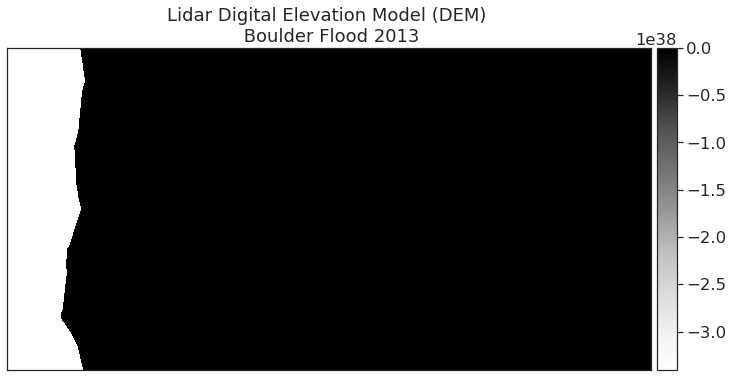

In [4]:
# Plot your data using earthpy
ep.plot_bands(dtm_pre_arr,
              title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013",
              cmap="Greys")

plt.show()

The data above should represent terrain model data. However, the range of 
values is not what is expected. These data are for Boulder, Colorado where 
the elevation may range from 1000-3000m. 

There may be some outlier values in the data that may need to be addressed. 
Below you check out the min and max values of the data. 


In [5]:
print("the minimum raster value is: ", dtm_pre_arr.min())
print("the maximum raster value is: ", dtm_pre_arr.max())

the minimum raster value is:  -3.4028235e+38
the maximum raster value is:  2087.43


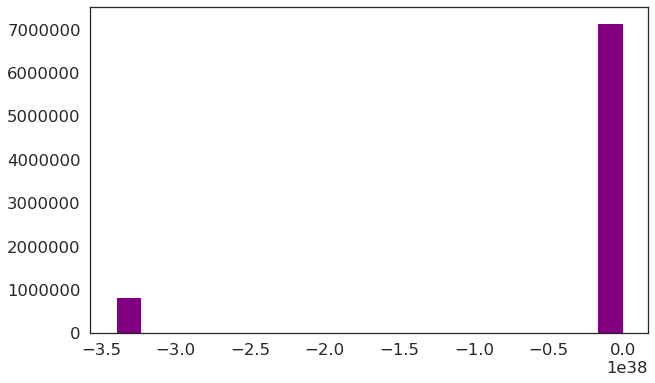

In [6]:
# A histogram can also be helpful to look at the range of values in your data
# What do you notice about the histogram below?
ep.hist(dtm_pre_arr,
       figsize=(10,6))
plt.show()

## Raster Data Exploration - Min and Max Values

Looking at the minimum value of the data, there is one of two things going on
that need to be fixed

1. there may be no data values in the data with a negative value that are skewing your plot colors
2. there also could be outlier data in your raster

You can explore the first option - that there are no data values by reading 
in the data and masking no data values using rasterio. To do this, you will use the `masked=True` parameter for the `.read()` function - like this:

`dem_src.read(1, masked=True)`

In [7]:
# Read in your data and mask the no data values
with rio.open(dem_pre_path) as dem_src:
    # Masked=True will mask all no data values
    dtm_pre_arr = dem_src.read(1, masked=True)

Notice that now the minimum value looks more like
an elevation value (which should most often not be negative). 

In [8]:
print("the minimum raster value is: ", dtm_pre_arr.min())
print("the maximum raster value is: ", dtm_pre_arr.max())

the minimum raster value is:  1676.21
the maximum raster value is:  2087.43


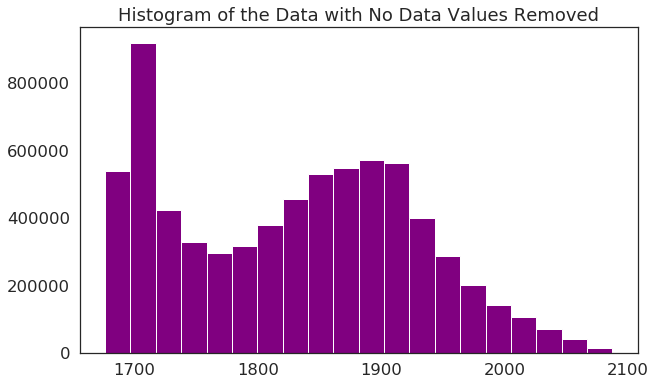

In [9]:
# A histogram can also be helpful to look at the range of values in your data
ep.hist(dtm_pre_arr,
       figsize=(10,6),
       title="Histogram of the Data with No Data Values Removed")
plt.show()

Plot your data again to see how it looks. 

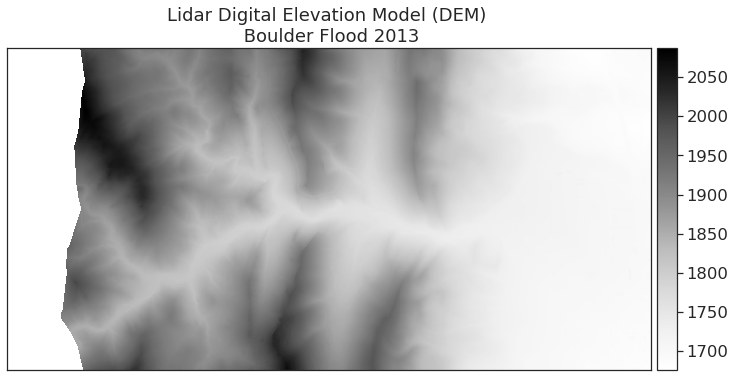

In [10]:
# Plot data using earthpy
ep.plot_bands(dtm_pre_arr,
              title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013",
              cmap="Greys")

plt.show()

## Rasterio Reads Files into Python as Numpy Arrays

When you call `src.read()` above, rasterio is reading in the data as a 
**numpy array**. A **numpy array** is a matrix of values. **Numpy arrays** are an 
efficient structure for working with large and potentially multi-dimensional (layered) matrices.

The numpy array below is type `numpy.ma.core.MaskedArray`. It is a masked
array because you chose to mask the no data values in your data. Masking
ensures that when you plot and perform other math operations on your data, 
those no data values are not included in the operations. 

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:**  <a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/numpy-arrays/" target="_blank">If you want to learn more about Numpy arrays, check out the intro to earth 
datascience textbook chapter on Numpy arrays. </a>
</div>

In [11]:
with rio.open(dem_pre_path) as dem_src:
    lidar_dem_im = dem_src.read(1, masked=True)

print("Numpy Array Shape:", lidar_dem_im.shape)
print("Object type:", type(lidar_dem_im))

Numpy Array Shape: (2000, 4000)
Object type: <class 'numpy.ma.core.MaskedArray'>


A numpy array does not by default store spatial information. However, your 
raster data is spatial - it represents a location on the earth's surface. 

You can acccess the spatial metadata within the context manager using 
`dem_src.profile`. Notice that the `.profile` object contains information including
the no data values for your data, the shape, the file type and even the coordinate 
reference system. You will learn more about 
<a href="https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/raster-metadata-in-python/" target="_blank">raster metadata in the raster metadata lesson in this chapter.</a>


In [12]:
with rio.open(dem_pre_path) as dem_src:
    lidar_dem_im = dem_src.read(1, masked=True)
    # Create an object called lidar_dem_meta that contains the spatial metadata
    lidar_dem_meta = dem_src.profile

lidar_dem_meta

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4000, 'height': 2000, 'count': 1, 'crs': CRS.from_epsg(32613), 'transform': Affine(1.0, 0.0, 472000.0,
       0.0, -1.0, 4436000.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


## Context Managers to Open and Close File Connections

The steps above represent the steps you need to open and plot a raster 
dataset using rasterio in python. The `with rio.open()` statement creates
what is known as a context manager. A context manager allows you to open 
the data and work with it. Within the context manager, Python makes 
a temporary connection to the file that you are trying to open. 

In the example above this was a file called `pre_DTM.tif`.

To break this code down, the context manager has a few parts. 
First, it has a `with` statement. The `with` statement creates 
a connection to the file that you want to open. The default connection
type is read only. This means that you can NOT modify that file
by default. Not being able to modify the original data is a good thing
because it prevents you from making unintended changes to your 
original data.

```
with rio.open(`file-path-here`) as file_src:
   dtm_pre_arr = dem_src.read(1, masked=True)
```

Notice that the first line of the context manager is not indented.
It contains two parts

1. `rio.open()`: This is the code that will open a connection to your .tif file using a path you provide. 
2. `file_src`: this is a rasterio reader object that you can use to read in the actual data. You can also use this object to access the metadata for the raster file.

The second line of your with statement 

  `dtm_pre_arr = dem_src.read(1, masked=True)`

is indented. Any code that is indented
directly below the with statement will become a part of the context manager.
This code has direct access to the `file_src` object which is you recall above is
the rasterio reader object.

Opening and closing files using rasterio and context managers is efficient as it establishes a connection to the raster file rather than directly reading it into memory. 

Once you are done opening and reading in the data, the context manager closes
that connection to the file. This efficiently ensures that the file won't be modified 
later in your code. 



<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:**  You can open and close files without 
a context manager using the syntax below. This approach however is generally
not recommended. 

```
lidar_dem = rio.open(dem_pre_path)
lidar_dem.close()
```
</div>

In [13]:
# Notice here the src object is printed and returns an "open" DatasetReader object
with rio.open(dem_pre_path) as src:
    print(src)

<open DatasetReader name='colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif' mode='r'>


In [14]:
# Note that the src object is now closed because it's not within the indented
# part of the context manager above
print(src)

<closed DatasetReader name='colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif' mode='r'>


```
# this returns an error as you have closed the connection to the file. 
show(lidar_dem)
```

```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-7-dad244dfd7d3> in <module>()
      1 # this returns an error as you have closed the connection to the file.
----> 2 show(lidar_dem)

~/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/rasterio/plot.py in show(source, with_bounds, contour, contour_label_kws, ax, title, **kwargs)
     80     elif isinstance(source, RasterReader):
     81         if source.count == 1:
---> 82             arr = source.read(1, masked=True)
     83         else:
     84             try:

rasterio/_io.pyx in rasterio._io.RasterReader.read (rasterio/_io.c:10647)()

rasterio/_io.pyx in rasterio._io.RasterReader._read (rasterio/_io.c:15124)()

ValueError: can't read closed raster file

```

## Plot Raster and Vector Data Together: Plot Extents

Numpy arrays are an efficient way to store and process data. However, by default
they do not contain spatial information. To plot raster and vector data together 
on a map, you will need to create an extent object that defines the spatial extent
of your raster layer. This will then allow you to plot a raster and vector
data together to create a map.  

Below you open a single shapefile that contains a boundary layer that you can 
overlay on top of your raster dataset.


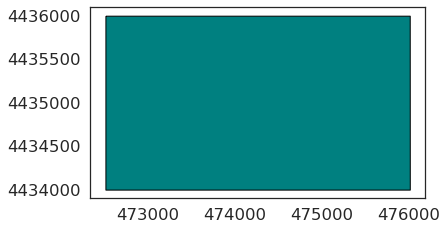

In [15]:
# Open site boundary vector layer
site_bound_path = os.path.join("colorado-flood",
                               "spatial",
                               "boulder-leehill-rd",
                               "clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)

# Plot the vector data
site_bound_shp.plot(color='teal',
                    edgecolor='black')
plt.show()

You can try to plot the two datasets together but you will see below that 
the output plot does not look correct. This is because the raster layer has no 
spatial information associated with it. 

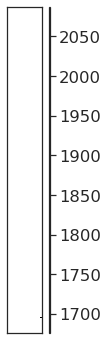

In [16]:
fig, ax = plt.subplots(figsize=(6,6))

ep.plot_bands(dtm_pre_arr, ax=ax)

site_bound_shp.plot(color='teal',
                    edgecolor='black', ax=ax)

plt.show()

In [17]:
with rio.open(dem_pre_path) as dem_src:
    lidar_dem_im = dem_src.read(1, masked=True)
    # Create an object called lidar_dem_meta that contains the spatial metadata
    lidar_dem_plot_ext = plotting_extent(dem_src)

# This plotting extent object will be used below to ensure your data overlay correctly
lidar_dem_plot_ext

(472000.0, 476000.0, 4434000.0, 4436000.0)

Next try to plot. This time however, use the `extent=` parameter
to specify the plotting extent within `ep.plot_bands()`

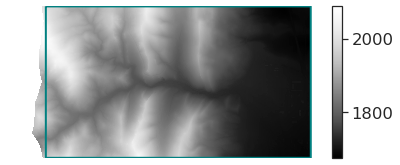

In [18]:
fig, ax = plt.subplots()

ep.plot_bands(dtm_pre_arr,
              ax=ax,
              extent=lidar_dem_plot_ext)

site_bound_shp.plot(color='None',
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax)
# Turn off the outline or axis border on your plot
ax.axis('off')
plt.show()

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:**  Customizing Raster Plot Color Ramps
To change the color of a raster plot you set the colormap. Matplotlib has a list of  <a href="https://matplotlib.org/users/colormaps.html" target="_blank">pre-determined color ramps that you can chose from.</a> You can reverse a color ramp by adding `_r` at the end of the color ramp's name, for example `cmap = 'viridis'` vs `cmap = 'viridis_r'`. 

</div>

You now have the basic skills needed to open and plot raster data. Complete
the challenges below to test your skills. 

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 1: Open And Plot Hillshade
 
It's time to practice your raster skills. Do the following:

Use the `pre_DTM_hill.tif` layer in the `colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar` directory.

1. Open the `pre_DTM_hill.tif` layer using rasterio.
2. Plot the data using `ep.plot_bands()`. 
3. Set the colormap (`cmap=`) parameter value to Greys: `cmap="Greys"`

Give you plot a title.

</div>

In [19]:
# Define relative path to file
dem_pre_path = os.path.join("colorado-flood", 
                              "spatial",
                              "boulder-leehill-rd", 
                              "pre-flood", 
                              "lidar",
                              "pre_DTM_hill.tif")

# Open the file using a context manager ("with rio.open" statement)


<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 2: Overlay DTM Over DTM Hillshade

In the challenge above, you opened and plotted a hillshade of the 
lidar digital terrain model create from NEON lidar data before
the 2013 Colorado Flood. In this challenge, you will use the hillshade
to create a map that looks more 3-dimensional by overlaying the 
DTM data on top of the hillshade. 

To do this, you will need to plot each layer using `ep.plot_bands()`

1. Plot the hillshade layer `pre_DTM_hill.tif` that you opened in Challenge 1. Similar to Challenge one set `cmap="Greys"`
2. Plot the DTM that you opened above `dtm_pre_arr`
  * When you plot the DTM, use the `alpha=` parameter to adjust the opacity of the DTM so that you can see the shading on the hillshade underneath the DTM. 
  * Set the colormap to viridis (or any colormap that you prefer) `cmap='viridis'` for the DTM layer. 


HINT: be sure to use the `ax=` parameter to make sure both 
layers are on the same figure. 

</div>

*****

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** 

* <a href="https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-raster-plots/overlay-raster-maps/" target="_blank">Check out this lesson on overlaying rasters if you get stuck trying to complete this challenge.</a>

* <a href="https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html" target="_blank">Check out the matplotlib colormap documentation for most on colormap options.</a>

</div>

In [20]:
# Add code for plot here


<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 3: Add A Site Boundary to Your Raster Plot

Take all of the code that you wrote above to plot the DTM on top 
of your hillshade layer. Add the site boundary layer that you opened above 
`site_bound_shp` to your plot. 

HINT: remember that the `plotting_extent()` object (`lidar_dem_plot_ext`) 
will be needed to add this final layer to your plot.

</div>

*****

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Plotting Raster and Vector Together

You can learn more about overlaying vector data on top of raster data to 
create maps in Python in <a href="https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-raster-plots/plotting-extents/" >this lesson on setting plotting extents.</a>
</div>



In [21]:
# Add code for plot here


<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 4 (Optional): Subtract Rasters

If you have two numpy arrays that are the same shape (same columns and rows) and the 
original data were in the same coordinate reference system, you can subtract the 
two datasets to calculate the difference - like this: 

`difference_raster = raster_array_one - raster_array_two`

Above, you opened up a lidar derived Digital Terrain Model (DTM or DEM) that was created from data collected
before the 2013 flood. In the post-flood directory, you will find a DTM containing 
data collected after the 2013 flood. Subtract the DTM_pre_flood from the DTM_post_flood:

`difference = dtm_pre_flood - dtm_post_flood`

Plot the output difference array using **earthpy** `plot_bands()`.


```python
# Define relative path to file
dem_pre_path = os.path.join("colorado-flood", "spatial",
                              "boulder-leehill-rd", "pre-flood", "lidar",
                              "pre_DTM.tif")
```

</div>

*****

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Subtract Rasters

Learn more  <a href="http://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/subtract-rasters-in-python/" >about subtracting raster data in this earthdatascience.org lesson.</a>
</div>


In [22]:
# Subtract the rasters and plot the output


<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 4 (Optional): Open Post Flood Raster 


Above, you opened up a lidar derived Digital Terrain Model (DTM or DEM) that was created from data collected
before the 2013 flood. In the post-flood directory, you will find a DTM containing 
data collected after the 2013 flood. 

Create a figure with two plots.

IN the first subplot, plot the pre-flood data that you opened above.
In the second subplot, open and plot the post-flood DTM data. You wil
find the file `post_DTM.tif` in the post-flood directory of your 
colorado-flood dataset downloaded using earthpy. 

* Add a super title (a title for the entire figure) using `plt.suptitle("Title Here")`
* Adjust the location of your suptitle `plt.tight_layout(rect=[0, 0.03, 1, 0.9])`



</div>

In [23]:
# Define relative path to file
dem_post_path = os.path.join("colorado-flood",
                             "spatial",
                             "boulder-leehill-rd",
                             "post-flood",
                             "lidar",
                             "post_DTM.tif")

# Open the file using a context manager ("with rio.open" statement) and plot both rasters